In [1]:
import pandas as pd
import glob
import re
import datetime as dt

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import difflib

%matplotlib inline

In [2]:
path = '../../local_files/scrapy_project/tutorial'
allFiles = glob.glob(path + "/*.csv")


In [3]:
allFiles[1]

'../../local_files/scrapy_project/tutorial/african_american_woman_movie.csv'

In [4]:
def getFiles(filename):
    df = pd.read_csv(filename, thousands=",")
    col = str(filename.split('/')[-1].replace('_movie.csv',""))
    df[col] = 1
    return df

In [5]:
df_all = getFiles(allFiles[0])

In [6]:
for file in allFiles[1:]:
    current_df = getFiles(file)
    df_all = pd.merge(df_all,current_df,how="outer", on=['title','user_score','meta_score','gross','runtime','genre','year','rating','director','votes','popularity','actor1','actor2','actor3','actor4','description'])

In [7]:
df_all.iloc[:2,:16]

,title,votes,director,year,popularity,actor2,actor3,meta_score,actor1,description,user_score,rating,runtime,actor4,gross,genre
0,La La Land,92976.0,Damien Chazelle,(I) (2016),1.0,Emma Stone,Rosemarie DeWitt,93.0,Ryan Gosling,\nA jazz pianist falls for an aspiring actress...,8.7,PG-13,128 min,J.K. Simmons,89680497.0,"\nComedy, Drama, Musical"
1,Hidden Figures,12581.0,Theodore Melfi,(2016),2.0,Octavia Spencer,Janelle Monáe,74.0,Taraji P. Henson,\nBased on a true story. A team of African-Ame...,8.0,PG,127 min,Kevin Costner,84238751.0,"\nBiography, Drama, History"


In [8]:
df_all['year']=df_all.year.str.replace(r'[^0-9]', '')
df_all['runtime']=df_all.runtime.str.replace(r'[^0-9]', '')
df_all['runtime']=df_all['runtime'].convert_objects(convert_numeric=True)
df_all['user_score']=df_all['user_score']*10

/Users/bauer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [9]:
test1 = df_all['runtime'][0]
test1, type(test1)

(128.0, numpy.float64)

In [10]:
df_all.iloc[:2,:16]

,title,votes,director,year,popularity,actor2,actor3,meta_score,actor1,description,user_score,rating,runtime,actor4,gross,genre
0,La La Land,92976.0,Damien Chazelle,2016,1.0,Emma Stone,Rosemarie DeWitt,93.0,Ryan Gosling,\nA jazz pianist falls for an aspiring actress...,87.0,PG-13,128.0,J.K. Simmons,89680497.0,"\nComedy, Drama, Musical"
1,Hidden Figures,12581.0,Theodore Melfi,2016,2.0,Octavia Spencer,Janelle Monáe,74.0,Taraji P. Henson,\nBased on a true story. A team of African-Ame...,80.0,PG,127.0,Kevin Costner,84238751.0,"\nBiography, Drama, History"


In [11]:
len(df_all)

60243

In [12]:
bbpath = path = '../../local_files/scrapy_project/tutorial/music'
#print(path+'/billboard.csv')
bbdata = pd.read_csv(bbpath+'/billboard.csv')

In [13]:
bbdata["title"]=bbdata["title_bb"]

In [14]:
bbdata["date_bb"] = pd.to_datetime(bbdata.date_bb , format="%B %d, %Y")
bbdata['last_bb']=bbdata.last_bb.str.replace(r'[\–]', '')
bbdata.head()

,peak_bb,date_bb,weeks_bb,last_bb,title_bb,title
0,1,2016-08-27,24,15,Suicide Squad: The Album,Suicide Squad: The Album
1,1,2014-08-23,87,120,Guardians Of The Galaxy: Awesome Mix Vol. 1,Guardians Of The Galaxy: Awesome Mix Vol. 1
2,1,2015-04-25,46,,Furious 7,Furious 7
3,1,2014-01-18,116,181,Frozen,Frozen
4,1,2015-05-30,31,183,Pitch Perfect 2,Pitch Perfect 2


In [15]:
bbdata.tail()

,peak_bb,date_bb,weeks_bb,last_bb,title_bb,title
645,92,1988-04-09,8,117,She s Having A Baby,She s Having A Baby
646,92,1988-04-23,8,103,She's Having A Baby,She's Having A Baby
647,93,2005-10-08,2,93,Desperate Housewives,Desperate Housewives
648,93,1996-05-25,5,154,The Great White Hype,The Great White Hype
649,93,1989-01-07,9,160,Scrooged,Scrooged


In [16]:
#bbdata['title'] = bbdata['title_bb'].apply(lambda x: difflib.get_close_matches(x, df_all['title'],n=1,cutoff=.3)[0] if difflib.get_close_matches(x, df_all['title'],n=1,cutoff=.3) else x)
#df_all['title_bb'] = df_all['title'].apply(lambda x: difflib.get_close_matches(x, bbdata['title_bb'],n=1,cutoff=.06)[0] if difflib.get_close_matches(x, bbdata['title_bb'],n=1,cutoff=.06) else x)

In [17]:
df_all.head()

,title,votes,director,year,popularity,actor2,actor3,meta_score,actor1,description,...,dog,female_nudity,gay,independent,lesbian,male_nudity,police,racism,sequel,transgender
0,La La Land,92976.0,Damien Chazelle,2016,1.0,Emma Stone,Rosemarie DeWitt,93.0,Ryan Gosling,\nA jazz pianist falls for an aspiring actress...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hidden Figures,12581.0,Theodore Melfi,2016,2.0,Octavia Spencer,Janelle Monáe,74.0,Taraji P. Henson,\nBased on a true story. A team of African-Ame...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Moonlight,16657.0,Barry Jenkins,2016,3.0,Shariff Earp,Duan Sanderson,99.0,Mahershala Ali,\nA timeless story of human self-discovery and...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Suicide Squad,337486.0,David Ayer,2016,4.0,Jared Leto,Margot Robbie,40.0,Will Smith,\nA secret government agency recruits some of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Magnificent Seven,90733.0,Antoine Fuqua,2016,5.0,Chris Pratt,Ethan Hawke,54.0,Denzel Washington,\nSeven gunmen in the old west gradually come ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import pickle

with open('bb_df_try2.pkl', 'wb') as picklefile:
    pickle.dump(df_all, picklefile)

In [19]:
#title_matches = df_all[['title','title_bb']]

In [20]:
#with open('title_matches.pkl', 'wb') as picklefile:
#    pickle.dump(title_matches, picklefile)

In [21]:
#title_matches.head(25)

In [22]:
bb_merge_this = bbdata[['peak_bb','date_bb','weeks_bb','last_bb','title']]
bb_merge_this.head(1)

,peak_bb,date_bb,weeks_bb,last_bb,title
0,1,2016-08-27,24,15,Suicide Squad: The Album


In [23]:
df_all['orig_title']= df_all['title']

In [24]:
bb_df = pd.merge(bb_merge_this,df_all,on='title',how='left')
bb_df.head()

,peak_bb,date_bb,weeks_bb,last_bb,title,votes,director,year,popularity,actor2,...,female_nudity,gay,independent,lesbian,male_nudity,police,racism,sequel,transgender,orig_title
0,1,2016-08-27,24,15,Suicide Squad: The Album,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2014-08-23,87,120,Guardians Of The Galaxy: Awesome Mix Vol. 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2015-04-25,46,,Furious 7,289754.0,James Wan,2015,55.0,Paul Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Furious 7
3,1,2014-01-18,116,181,Frozen,54601.0,Adam Green,2010,693.0,Emma Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Frozen
4,1,2015-05-30,31,183,Pitch Perfect 2,104289.0,Elizabeth Banks,2015,92.0,Rebel Wilson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Pitch Perfect 2


**Regularization**

In [25]:
X_bb_df = bb_df.drop(['gross'],1)
y_bb_df = bb_df['gross'] 


In [26]:
from sklearn import preprocessing

In [29]:
# first we will zero-mean (& unit variance) our features:
#X_sc=preprocessing.normalize(X_bb_df)
# turn back in DF
#X_sc=pd.DataFrame(X_sc)
# quick sanity check 
#print(X_sc.std()[1])
#X_sc.mean()[1]

In [30]:
rcv = RidgeCV(cv=10)

In [31]:
rcv.fit(X_sc, y_bb_df)
rcv.score(xtest, ytest)

NameError: name 'X_sc' is not defined

Lasso

In [32]:
# Take a quick look at our strongest features
X_train, X_test, y_train, y_test = train_test_split(X_sc, y_bb_df, test_size=0.3)

est=Lasso(alpha=1e-3)
est.fit(X_train,y_train)
est.alpha

zipped=zip(X_bb_df.columns,est.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
features[:5]

NameError: name 'train_test_split' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [ ]:
metrics = df_all[['year','meta_score','user_score','runtime','gross','votes']]

In [ ]:
metrics.corr()

In [ ]:
metrics.info()

In [ ]:
metrics_full = metrics.dropna()

In [ ]:
metrics_full['year']=list(metrics_full['year'].apply(lambda x: int(x)))

In [ ]:
metrics_1 = metrics_full[metrics_full['year']>1980]

In [ ]:
sns.pairplot(metrics_1)

In [ ]:
#def reject_outliers(data, m=2):
#    return data[abs(data - np.mean(data)) < m * np.std(data)]
#metrics_2 = [reject_outliers(x,m=2) for x in metrics_1]

In [ ]:
y, X = patsy.dmatrices('user_score ~ meta_score + gross + runtime + votes + year', data=metrics_1, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

In [ ]:
fit.resid.plot(style='o', figsize=(12,8))

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(fit, "meta_score", ax=ax)

In [ ]:
sns.regplot(x="meta_score", y="user_score", data=metrics_1)

In [ ]:
africanAmerican= df_all[df_all['african_american']==1]
africanAmerican.iloc[:2,:14]

In [ ]:
metrics_aa = africanAmerican[['year','meta_score','user_score','runtime','gross','votes']]
metrics_aa = metrics_aa.dropna()
metrics_aa['year']=list(metrics_aa['year'].apply(lambda x: int(x)))
metrics_aa = metrics_aa[metrics_aa['year']>1980]

In [ ]:
yaa, Xaa = patsy.dmatrices('user_score ~ meta_score + gross + runtime + votes + year', data=metrics_aa, return_type="dataframe")
modelaa = sm.OLS(yaa, Xaa)
fitaa = modelaa.fit()
fitaa.summary()

In [ ]:
fitaa.resid.plot(style='o', figsize=(12,8))

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(fitaa, "meta_score", ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(fitaa, fig=fig)

In [ ]:
y1, X1 = patsy.dmatrices('user_score ~ gross + runtime + votes + year', data=metrics_1, return_type="dataframe")
model1 = sm.OLS(y1, X1)
fit1 = model1.fit()
fit1.summary()

In [ ]:
fit1.resid.plot(style='o', figsize=(12,8))

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(fit1, "gross", ax=ax)

In [ ]:
notafricanAmerican= df_all[df_all['african_american']!=1]
notafricanAmerican= notafricanAmerican[notafricanAmerican['african_american_woman']!=1]

In [ ]:
notafricanAmerican.iloc[:2,:18]

In [ ]:
sample_naa = notafricanAmerican.take(np.random.permutation(len(notafricanAmerican))[:len(africanAmerican)])
sample_naa['african_american'].fillna(0, inplace=True)
sample_naa.iloc[:2,:18]

In [ ]:
len(africanAmerican), len(sample_naa)

In [ ]:
africanAmerican.iloc[:2,:18]

In [ ]:
aavsnotaa = africanAmerican.append(sample_naa, ignore_index=True)
aavsnotaa.iloc[:2,:18]

In [ ]:
aavsnotaa.iloc[-4:-2,:18]

In [ ]:
sns.lmplot(x="user_score", y="meta_score", hue="african_american", data=aavsnotaa)

In [33]:
def comparison_data(variable,xvar,yvar):
    indata= df_all[df_all[variable]==1]
    notindata= df_all[df_all[variable]!=1]
    notindata = notindata.take(np.random.permutation(len(notindata))[:len(indata)])
    notindata[variable].fillna(0, inplace=True)
    intonotin = indata.append(notindata, ignore_index=True)
    return sns.lmplot(x=xvar, y=yvar, hue=variable, data=intonotin)

In [34]:
bi_vars = ['african_american','african_american_woman', 'bisexual', 'cat', 'crying', 'cult', 'dog',\
           'female_nudity', 'gay', 'independent', 'lesbian', 'male_nudity','police', 'racism',\
           'sequel', 'transgender']

In [35]:
df_all.columns

Index(['title', 'votes', 'director', 'year', 'popularity', 'actor2', 'actor3',
       'meta_score', 'actor1', 'description', 'user_score', 'rating',
       'runtime', 'actor4', 'gross', 'genre', 'african_american',
       'african_american_woman', 'bisexual', 'cat', 'crying', 'cult', 'dog',
       'female_nudity', 'gay', 'independent', 'lesbian', 'male_nudity',
       'police', 'racism', 'sequel', 'transgender', 'orig_title'],
      dtype='object')

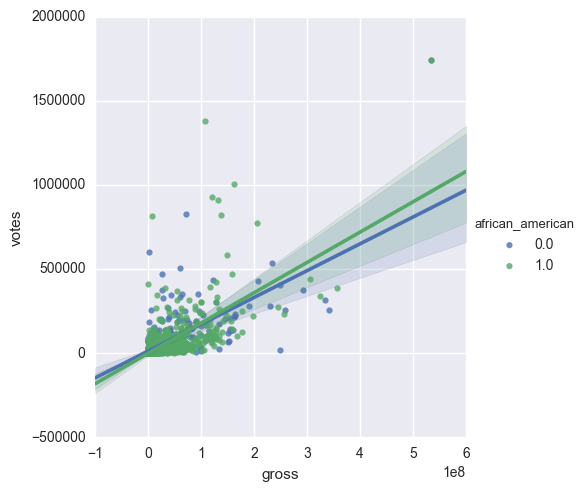

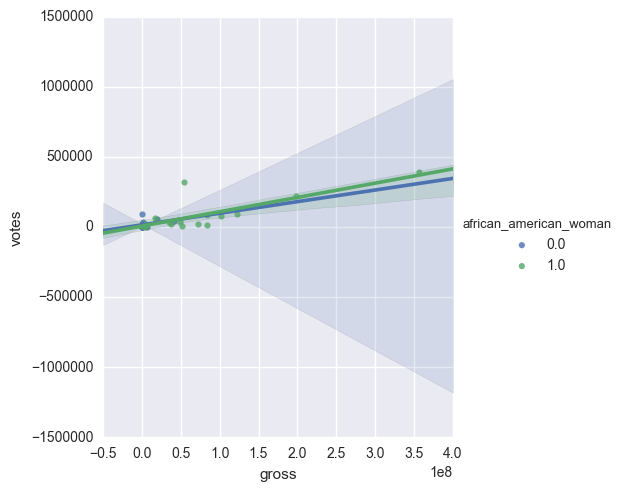

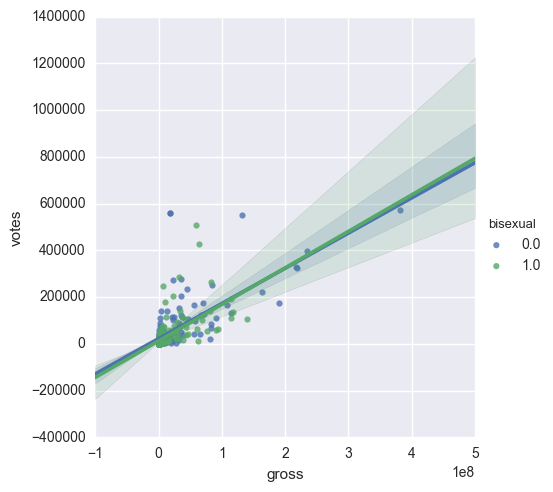

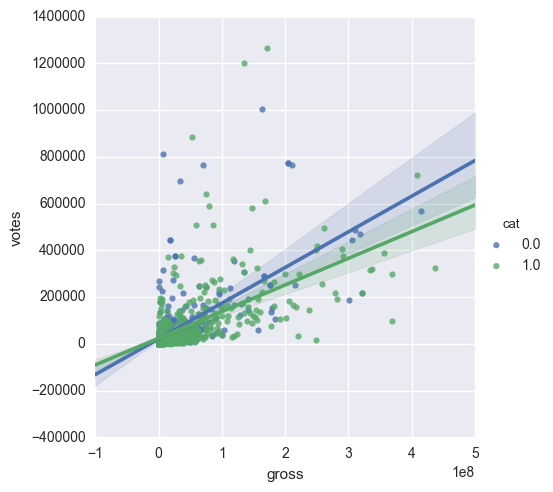

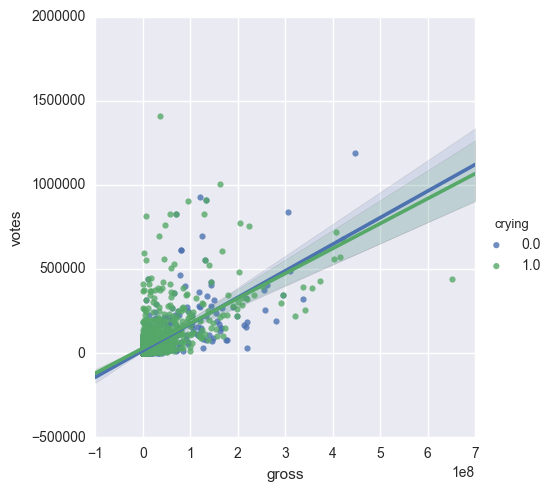

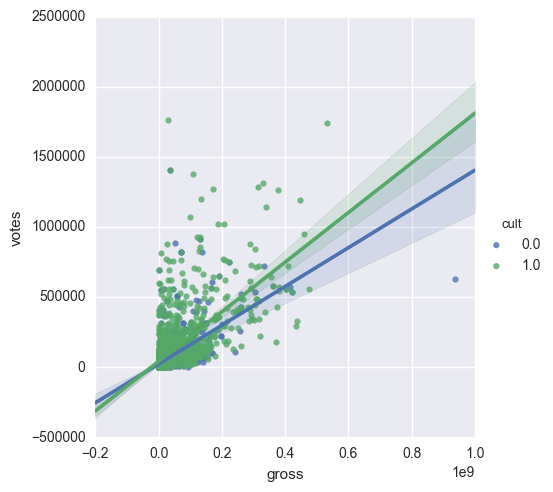

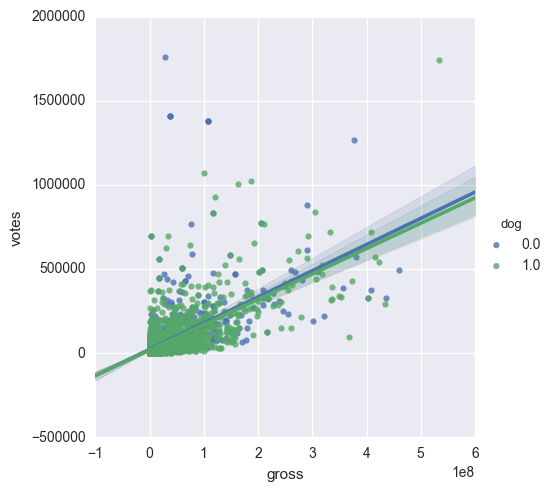

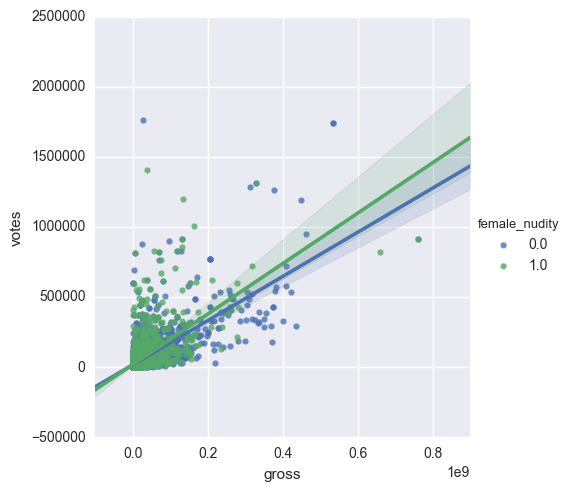

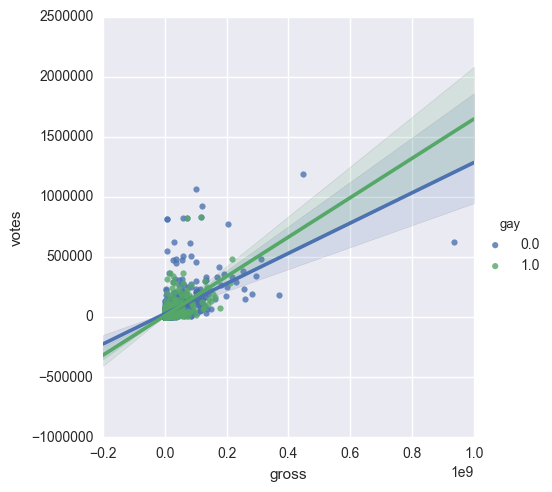

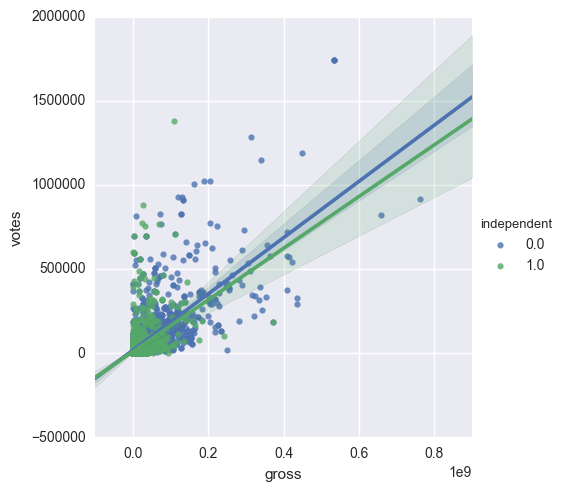

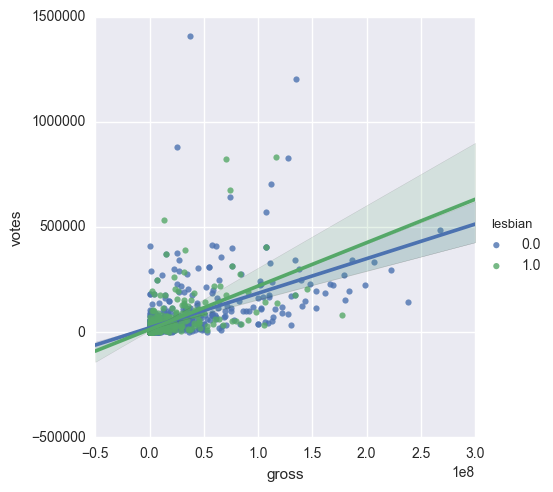

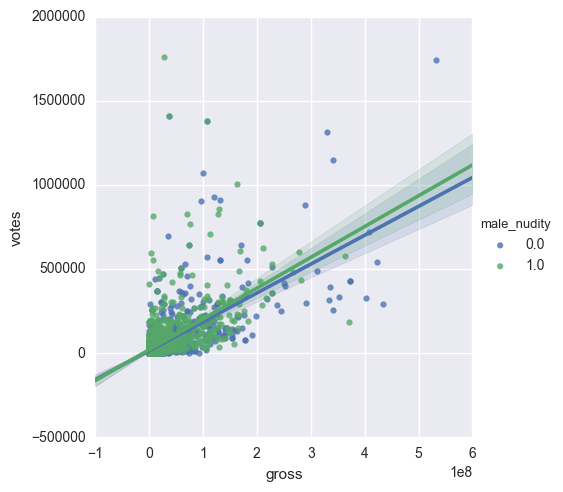

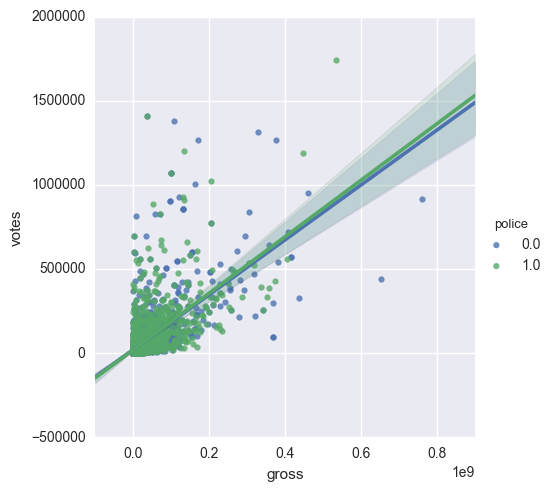

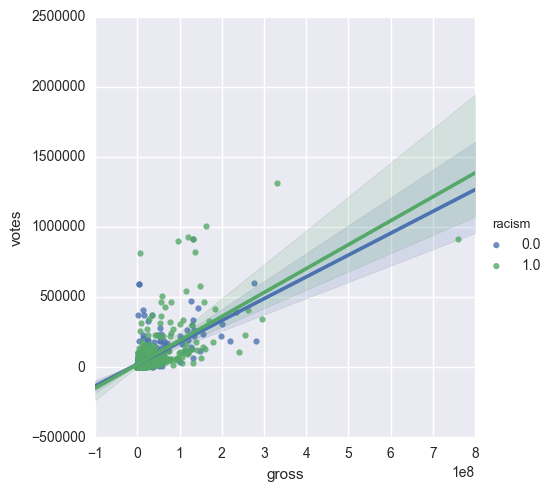

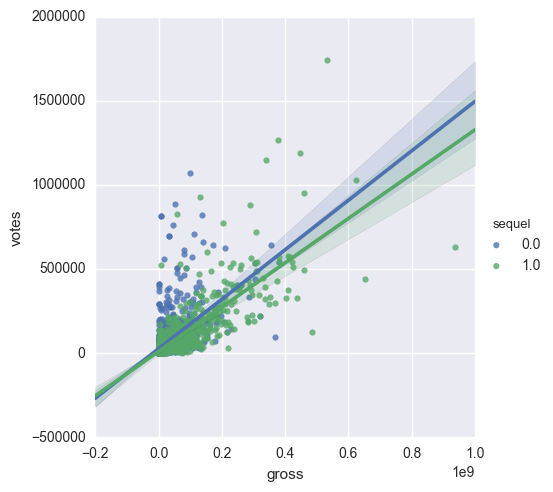

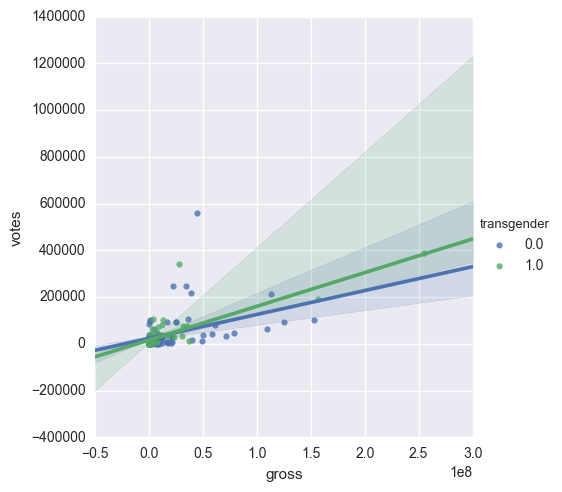

In [36]:
for i in bi_vars:
    comparison_data(i,'gross','votes')

In [ ]:
for i in bi_vars:
    comparison_data(i,'gross','meta_score')

In [ ]:
for i in bi_vars:
    comparison_data(i,'user_score','meta_score')

In [ ]:
for i in bi_vars:
    comparison_data(i,"meta_score","user_score")

In [ ]:
comparison_data('african_american_woman',"user_score","meta_score")
fig.suptitle('Meta Score from User Score for African American Woman vs. Sample') 

In [ ]:
comparison_data('cult',"meta_score","user_score")

In [ ]:
comparison_data('police',"meta_score","user_score")

In [ ]:
comparison_data('police',"meta_score","user_score")

In [ ]:
comparison_data('racism',"meta_score","user_score")

In [ ]:
comparison_data('independent',"meta_score","user_score")

In [ ]:
comparison_data('gay',"meta_score","user_score")

In [ ]:
comparison_data('transgender',"meta_score","user_score")

In [ ]:
comparison_data('lesbian',"meta_score","user_score")

In [ ]:
comparison_data('bisexual',"meta_score","user_score")

In [ ]:
comparison_data('sequel',"user_score","meta_score")

In [ ]:
comparison_data('crying',"user_score","meta_score")

In [ ]:
comparison_data('female_nudity',"meta_score","user_score")

In [ ]:
comparison_data('male_nudity',"meta_score","user_score")